# Part 1: Option Valuation

## Ex. 1: Binomial tree program to approximate the price of the option. 
How does your estimate compare to the analytical value? <br>
Experiment for different values of the volatility

In [107]:
import math
from scipy.stats import norm

stock_price = 100.0
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20
steps = 50
T = 1 # maturity time 1 year

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)

print('u', u)
print('d', d)

''' The bionomial tree. ''' 
def binomial_tree(steps, start):
    ''' Binomial tree to approximate the price of the option. ''' 
    # Result includes stock price [0], option price [1], delta [2]
    results = [[[start, 0, 0]]]
    
    for i in range(steps): 
        result = []
        for j in range(len(results[-1])):
            # calculate the stock price [0]
            if j == 0:
                result.append([results[-1][j][0] * d, 0, 0])
            result.append([results[-1][j][0] * u, 0, 0])
        results.append(result)  
   
    return results


''' Approximate value with the european price call. ''' 
def call_option(S, K):
    ''' Calculates the value of a call option at its expiration date. '''
    return max(0, S - K)

def risk_neutral_valuation(r, dt, fi, fj): 
    ''' Risk-neutral valuation of the option '''
    return math.exp(-r * dt) * (p * fi + (1 - p)*fj)

def price_EU_call(treelist, strike_price):
    ''' The price of the European call '''
    lentree = len(treelist)
    
    # calculate the option prices [1]
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    # calculate risk neutral valuation: back in time [1]
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is list maybe here is the bug????
#             print('j', j)
            
            treelist[i][j][1] = risk_neutral_valuation(interest_rate, 1/steps, treelist[i+1][j][1], treelist[i+1][j+1][1])

#     for i in range(lentree - 1):
#         for j in range(len(treelist[-(i+2)])): 
#             treelist[-(i+2)][k][1] = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1])
#              treelist[-(j+2)][k][1] = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(j+1)][k+1][1], treelist[-(j+1)][k][1])
#            
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])        
    return treelist


'''Analytical value'''
def black_scholes(stock_price, strike_price, interest_rate, volatility, T):
    d1 = (math.log(stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
    #d2 = d1 - volatility* math.sqrt(T)
    d2 = (math.log(stock_price / strike_price) + (interest_rate - (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
   
    call = stock_price * norm.cdf(d1) - strike_price * math.exp(- interest_rate * T) * norm.cdf(d2)
    put = strike_price * math.exp(-interest_rate * T ) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)

    return call, put

u 1.0286880693018583
d 0.9721119840328972


In [114]:
''' The estimate compared to the analytical value '''
treelist = binomial_tree(steps, stock_price)
filled_tree = price_EU_call(treelist, strike_price)

#TEST TREE
# treelist = binomial_tree(4, 10)
# filled_tree = price_EU_call(treelist, 12)
# print(filled_tree[3])

#The estimate 
estimated_price = filled_tree[0][0][1]
print(filled_tree)
print('The estimated price of the option:', estimated_price)

#The analytical value
analytical_call, analytical_put = black_scholes(stock_price, strike_price, interest_rate, volatility, T)
print('The analytical price of the option:', analytical_call)


[[[100.0, 6.9413989712433875, 0]], [[97.21119840328973, 5.6273677202100245, 0], [102.86880693018583, 8.349139381517372, 0]], [[94.50017095003759, 4.487288862048044, 0], [100.0, 6.847773945738397, 0], [105.81991439239847, 9.958606971287493, 0]], [[91.864748673689, 3.5140442948508808, 0], [97.21119840328971, 5.528323603494666, 0], [102.86880693018583, 8.261017774135857, 0], [108.85568343000432, 11.779707762823069, 0]], [[89.30282309586327, 2.6979486126897507, 0], [94.50017095003759, 4.386369534002475, 0], [99.99999999999999, 6.7504695114332005, 0], [105.81991439239847, 9.879985390576087, 0], [111.97854282014544, 13.819218475664165, 0]], [[86.81234453945848, 2.0269733098290685, 0], [91.864748673689, 3.414682001494357, 0], [97.21119840328971, 5.4255071180125665, 0], [102.86880693018581, 8.16930604041468, 0], [108.85568343000432, 11.714744650334033, 0], [115.19099101689088, 16.080449703066687, 0]], [[84.39132048880043, 1.4871341183329423, 0], [89.30282309586326, 2.603272476141479, 0], [94.5

No handles with labels found to put in legend.


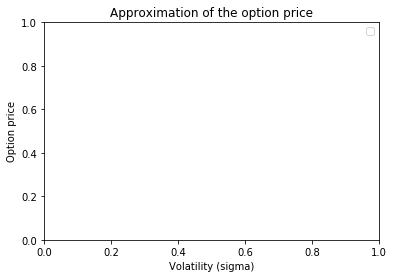

In [75]:
''' Different values of volatility '''
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

volatility = np.linspace(0,1,100)

for i in volatility: 
    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price)

    # Estimated  and analytical price
    estimated_price = filled_tree[0][0][1]  
    
plt.plot(len(estimated_prices), estimated_price, label ='Estimated price')
plt.plot(len(analytical_prices, analytical_price, label ='Analytical price')

plt.title('Approximation of the option price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#TEST 



## Ex. 2: Convergence of the method
What is the computational complexity of this algorithm? <br>
Done

## Ex. 3: Hedge parameter
Compare with the analytical values. 
Experiment for different values of the volatility.

In [4]:
def calc_delta(treelist):
    lentree = len(treelist)
        
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][2] = (treelist[-(j+1)][k][1] - treelist[-(j+1)][k+1][1]) / (treelist[-(j+1)][k][0] - treelist[-(j+1)][k+1][0])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist

In [5]:
better_tree = calc_delta(filled_tree)
print(better_tree[0])

[[100.0, 6.9413989712433875, 0.48108165285175314]]


## Ex. 4: American option 
What is the value of the American put and call for the corresponding parameters? <br>
Experiment for different values of the volatility.

In [ ]:
from scipy.stats import norm


d1 = (math.log(stock_price / strike_price) + (interest_rate + volatility ** 2 / 2) * T)
d2 = d1 - volatility* math.sqrt(T)


call = stock_price*norm.cdf(d1) - strike_price*math.exp(-interest_rate * T)*norm.cdf(d2)
put = strike_price*math.exp(-interest_rate * T ) * norm.cdf(-d2) - stock_price*norm.cdf(-d1)

print(call, put)

In [ ]:
def price_US_call(treelist, strike_price):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1])
            use_now_value = call_option(treelist[-(j+2)][k][0], strike_price)
            
            treelist[-(j+2)][k][1] = max(keeping_value, use_now_value)
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist

treelist = binomial_tree(steps, stock_price)
print(price_US_call(treelist, strike_price))

# Part 2: Hedging Simulations

In [ ]:
# T = 1

stock_price = 100.0
strike_price = 99.0
interest_rate = 1.06
volatility = 0.20

def dynamics_stock_price(r, S, dt, sigma, dZ):
    return r*S*dt + sigma * S * dZ

